In [1]:
%pylab inline
import numpy as np
from qutip import sigmax, sigmay, sigmaz, basis, expect
from qutip.nonmarkov.heom import HSolverDL
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Defining the system Hamiltonian
wq = 0.5     # Energy of the 2-level system.
Del = 1.0    # Tunnelling term
Hsys = 0.5*wq*sigmaz() + 0.5*Del* sigmax()

# Bath description parameters (for HEOM)
Temperature = 1.0/0.95 # in units where Boltzmann factor is 1
Nk = 2 # number of exponentials in approximation of the the spectral density
Ncut = 20#30 # cut off parameter for the bath

# System-bath coupling (Drude-Lorentz spectral density)
Q = sigmaz() # coupling operator
wc = 0.05 # cut off frequency
alpha = 2.5/np.pi # coupling strenght

hsolver = HSolverDL(Hsys, Q, alpha, Temperature, Ncut, Nk, wc, stats=True)# Define some operators with which we will measure the system


In [3]:
# Initial state of the system.
initial_state= basis(2,1) * basis(2,1).dag()                # Initial state of the system.   
# Times to record state
tlist = np.linspace(0, 40, 600)
# run the solver
result = hsolver.run(initial_state, tlist)
hsolver.stats.report()

# 1,1 element of density matrix - corresonding to groundstate
return_vals = [0.5*(sigmaz()-eye(2))]

options = Options(nsteps=15000, store_states=True)        # Options for the solver.

output = rcsolve(Hsys, initial_state, tlist, return_vals, Q, wc, alpha, Ncut, 
                Temperature, options=options)


# Calculate expectation values in the bases
P11exp = expect(result.states, return_vals)


Hierarchy Solver Stats

config
------
### Timings:
 - 0:00:00.152186 (96.48% section, 20.21% total)	hierarchy contruct
 - 0:00:00.000706 (0.45% section, 0.09% total)	Liouvillian contruct
 - 0:00:00.157744	config total time
### Counts:
 - 231	Num hierarchy elements
 - 840	Num he interactions
### Messages:
 - options:	renormalisation;boundary cutoff approx

run
---
### Timings:
 - 0:00:00.000247 (0.04% section, 0.03% total)	initialize
 - 0:00:00.595003 (99.96% section, 79.02% total)	integrate
 - 0:00:00.595267	run total time
### Counts:
### Messages:

Summary
-------
0:00:00.753011	 solver total time


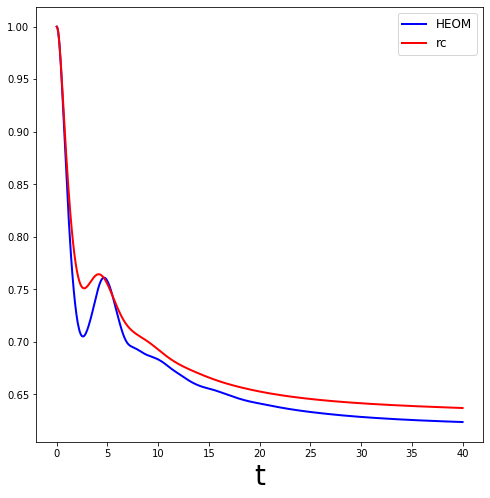

In [4]:
# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(tlist, -np.real(P11exp), 'b', linewidth=2, label="HEOM")
axes.plot(tlist, -real(output.expect[0]), 'r', linewidth=2, label="rc")
axes.set_xlabel(r't', fontsize=28)
axes.legend(loc=0, fontsize=12)